In [13]:
#Importing essential libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('Kathmandu_House_Price.csv')

In [17]:
df.head() # Display 1st 5 rows

,Unnamed: 0,District,VDC,Direction,Bedroom,Bathroom,Living,Kitchen,Total,Parking,Built,Road_size,Land_area,Price_Rs
0,0,Kathmandu,Sukedhara,East,3,6,3,3,11,Car 1,700 sqft Sqft,13 ft,3anna,two crore fifteen lakhs
1,1,Kathmandu,Sukedhara,East,3,6,3,3,11,Car 1,700 sqft Sqft,13 ft,3anna,two crore fifteen lakhs
2,2,Kathmandu,rabibhawan,South,5,5,1,1,undefined,Car 1,Sqft,20 ft,4 aana,five crore
3,3,Kathmandu,rabibhawan,South,5,5,1,1,undefined,Car 1,Sqft,20 ft,4 aana,five crore
4,4,Kathmandu,Dahachowk,South,5,2,1,1,8,Motorcycle,850 sqft Sqft,13 ft,2.5 anna,one crore fifty lakhs


In [19]:
df.isnull().sum() # Checking for Null values

Unnamed: 0      0
District        0
VDC             0
Direction       0
Bedroom         0
Bathroom        0
Living          0
Kitchen       639
Total         644
Parking         0
Built           0
Road_size     152
Land_area       0
Price_Rs       16
dtype: int64

In [21]:
df.drop(columns = ['Unnamed: 0','Kitchen','Total'],inplace = True) # Dropping the 'Unnamed: 0' column which is not usefull

In [23]:
df.head() # Display 1st 5 rows

,District,VDC,Direction,Bedroom,Bathroom,Living,Parking,Built,Road_size,Land_area,Price_Rs
0,Kathmandu,Sukedhara,East,3,6,3,Car 1,700 sqft Sqft,13 ft,3anna,two crore fifteen lakhs
1,Kathmandu,Sukedhara,East,3,6,3,Car 1,700 sqft Sqft,13 ft,3anna,two crore fifteen lakhs
2,Kathmandu,rabibhawan,South,5,5,1,Car 1,Sqft,20 ft,4 aana,five crore
3,Kathmandu,rabibhawan,South,5,5,1,Car 1,Sqft,20 ft,4 aana,five crore
4,Kathmandu,Dahachowk,South,5,2,1,Motorcycle,850 sqft Sqft,13 ft,2.5 anna,one crore fifty lakhs


In [25]:
df.shape # Checking shape of dataset

(1793, 11)

In [27]:
df.drop_duplicates(inplace = True) # Drop duplicates data if there

In [29]:
df.info() # Display number of non-null values, datatype and memory usuage

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 1792
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   District   890 non-null    object
 1   VDC        890 non-null    object
 2   Direction  890 non-null    object
 3   Bedroom    890 non-null    object
 4   Bathroom   890 non-null    object
 5   Living     890 non-null    object
 6   Parking    890 non-null    object
 7   Built      890 non-null    object
 8   Road_size  814 non-null    object
 9   Land_area  890 non-null    object
 10  Price_Rs   882 non-null    object
dtypes: object(11)
memory usage: 83.4+ KB


In [31]:
df['Built'].value_counts() # Checking frequency of unique values of 'Built' column

Built
Sqft             503
00 Sqft          118
0 Sqft           115
700 sqft Sqft     26
800 sqft Sqft     12
                ... 
840 Sqft           1
1400sft. Sqft      1
1000 Sqft          1
2100 Sqft          1
2224.625 Sqft      1
Name: count, Length: 74, dtype: int64

In [33]:
df.drop(columns = ['Built'],inplace = True) # More than 50% row of Build column have 'Sqft' which is null value so we have to drop built column

In [35]:
df['Parking'].value_counts() # Checking frequency of unique values of 'Parking' column

Parking
Car 1         327
undefined     191
Motorbike     123
Car 2          88
Cars 2         50
Car 3-5        44
Motorcycle     37
Car 3+         10
Cars 3-5        9
Car 5-10        8
Car 5+          2
Cars 5-10       1
Name: count, dtype: int64

# Assigning area to park vehicle
**For 2 wheel vehicle = 22 sqft**</br>
**For Car = 85 sqft**

In [38]:
# Defining Function to clean the 'Parking' column
def extract_parking(column):
    
    if column == 'undefined': # return nan if the value is 'undefined'
        return np.nan
    elif column == 'Motorbike' or column == 'Motorcycle': #return value '22' sqft for 'Motorbike' and 'Motorcycle'
        return 22
    else:
        try:
            value = column.split()[1].split('-')[1] # Handles values like 'Car 5-10'
            return int(value) *85
        except:
            value = column.split()[1].split('+')[0] # Handles values like 'Car 5+'
            return int(value) * 85

In [40]:
df['Parking_sqft'] = df['Parking'].apply(extract_parking) # Applying extract_parking function to 'parking' column

In [42]:
df['Road_size'].value_counts() # Checking frequency of unique values of 'Parking' column

Road_size
13 ft       288
20 ft       103
13 Ft        58
16 ft        54
10 ft        43
           ... 
9 Feet        1
22 meter      1
13-22 ft      1
6,7,12ft      1
12 f          1
Name: count, Length: 104, dtype: int64

In [96]:
# Defining the extract_roadsize function to clean the 'Road_size' column
def extract_roadsize(column):
    
    value = str(column).split()[0] # get first value from ('13 ft', '9 Feet')
    result =  value.split('f')[0] # get integer number from values like ('12ft', '15f')
    if result == 'Only': 
        print(df[df['Road_size'] == column])
        print('\n')
        return 30
    else:
        try:
            return int(result) # return if value is integer
        except:
            return np.nan # return nan if not integer

In [94]:
df['Road_size_ft'] = df['Road_size'].apply(extract_roadsize) # Applying extract_roadsize funtion to 'Road_size' column

      District                         VDC Direction Bedroom Bathroom Living  \
1644  Lalitpur  Near Krishna Mandir imadol      East    8-12        6     11   

     Parking                     Road_size Land_area     Price_Rs  \
1644   Car 2  Only 2 kitta from 30 ft road   1300sft  three crore   

      Parking_sqft  Road_size_ft  
1644         170.0          30.0  


      District                         VDC Direction Bedroom Bathroom Living  \
1646  Lalitpur  Near Krishna Mandir imadol      East       7        4     11   

     Parking                             Road_size  Land_area  \
1646   Car 2  Only 1 kitta from 30 ft main highway  1000 sqft   

                     Price_Rs  Parking_sqft  Road_size_ft  
1646  two crore eighty  lakhs         170.0          30.0  




In [241]:
df['Direction'].unique() # Checking unique value of 'Direction' column

array(['East', 'South', 'South West', 'North East', 'North', 'West',
       'South East', 'North West', 'Select Direction', 'South east',
       'North east', 'South west', 'North west'], dtype=object)

### Land Measurement Units in Nepal
**1 Ropani**: 5476 sq. ft (1 ropani = 16 aana)<br>
**1 Aana**: 342.25 sq. ft (1 aana = 4 paisa)<br>
**1 Paisa**: 85.56 sq. ft (1 paisa = 4 dam)<br>
**1 Dam (Daam)**: 21.39 sq. ft<br>
**1 Dam** = 21.39 square feet


In [103]:
import re # Importing regular expression

def landarea(column):
    try:
        
        # make the column to lowercase and insert spaces between number and unit (eg: '1ropani' = '1 ropani')
        column = re.sub(r'(\d+)(aana|anna|ana|aanna|ropani|paisa|dam|daam)', r'\1 \2', column.lower())
        result = 1 # initialize result
        
        if '-' in column: # check if there is any value contain '-' (eg: '6-3-1-0')
            
            parts = list(map(float, column.split('-'))) # split the value and store it in list (eg: '6-3-1-0' = [6,3,1,0])
            
            if len(parts) > 3:
                '''Here converting all value into Dam i.e
               -> 1 Ropani = 256 dam
               -> 1 Aana = 16 dam
               -> 1 Paisa = 4 dam
                '''
                result = parts[0] * 256 + parts[1] * 16 + parts[2] * 4 + parts[3] * 1
                return round(result * 21.39, 2)
            else:
                result = parts[0]*16+ parts[1] * 4 + parts[2] * 1
                
        list1 = column.split()
        for i in list1:
            try:
                if i in ['aana', 'anna', 'ana', 'aanna']:
                    result *= 16      # Multiply by 16 for Aana
                elif i == 'ropani':
                    result *= 256  # Multiply by 256 for Ropani
                elif i == 'paisa':
                    result *= 4    # Multiply by 4 for Paisa
                elif i in ['dam', 'daam']:
                    result *= 1
                else:
                    result *= int(i)
            except:
                continue

        return round(result * 21.39, 2) # Converting Dam into sqft as 1 Dam = 21.39 square feet
    except Exception as e:
        print(f"Error processing '{column}': {e}")
        return None 


In [105]:
df['Land_sqft'] = df['Land_area'].apply(landarea)

Error processing 'o-3-1-0': could not convert string to float: 'o'
Error processing '6-3-1-0 2023 sq ft': could not convert string to float: '0 2023 sq ft'
Error processing '4.5 - 11 aana': could not convert string to float: ' 11 aana'
Error processing '0-2-2-2 ropani': could not convert string to float: '2 ropani'


In [107]:
from word2number import w2n # Importing word2number for converting word to number

# Defining convert_currency to convert word currency into number
def convert_currency(column):
    dict = {
        'crore' : 10000000,
        'crores' : 10000000,
        'lakhs' : 100000,
        'lakh' : 100000,
        'thouss' : 1000,
        'hundred' : 100 }
    total = 0
    currency = 0
    try:
        list = column.lower().replace('and','').split() # Remove and from value
        for i in list:
            try:
                # Convert the word to a number (e.g., 'twenty' -> 20, 'six' -> 6)
                value = w2n.word_to_num(i) 
                currency += value
            except:
               # If it a unit (like 'lakh','crore'), multiply and add to total
                if i in dict:
                    currency *= dict[i]
                    total += currency
                    currency = 0
        return total
    except:
        return np.nan

In [109]:
df['Price'] = df['Price_Rs'].apply(convert_currency) # Apply convert_currency to 'Price_Rs' column

In [111]:
df.head()

,District,VDC,Direction,Bedroom,Bathroom,Living,Parking,Road_size,Land_area,Price_Rs,Parking_sqft,Road_size_ft,Land_sqft,Price
0,Kathmandu,Sukedhara,East,3,6,3,Car 1,13 ft,3anna,two crore fifteen lakhs,85.0,13.0,1026.72,21500000.0
2,Kathmandu,rabibhawan,South,5,5,1,Car 1,20 ft,4 aana,five crore,85.0,20.0,1368.96,50000000.0
4,Kathmandu,Dahachowk,South,5,2,1,Motorcycle,13 ft,2.5 anna,one crore fifty lakhs,22.0,13.0,342.24,15000000.0
6,Kathmandu,Mandikatar,South,3,3,3,Cars 2,13 ft,3 aana,two crore fifty lakhs,170.0,13.0,1026.72,25000000.0
8,Kathmandu,Pasikot,East,6,5,2,Cars 2,20 ft,5 aana,four crore seventy five lakhs,170.0,20.0,1711.20,47500000.0


In [113]:
df.drop(columns = ['Parking','Land_area','Road_size','Price_Rs'],inplace = True) # Droping the unnecessary columns

In [117]:
df.isnull().sum() # Checking for Null values

District          0
VDC               0
Direction         0
Bedroom           0
Bathroom          0
Living            0
Parking_sqft    191
Road_size_ft     89
Land_sqft         4
Price             8
dtype: int64

In [119]:
df.head() # first 5 rows

,District,VDC,Direction,Bedroom,Bathroom,Living,Parking_sqft,Road_size_ft,Land_sqft,Price
0,Kathmandu,Sukedhara,East,3,6,3,85.0,13.0,1026.72,21500000.0
2,Kathmandu,rabibhawan,South,5,5,1,85.0,20.0,1368.96,50000000.0
4,Kathmandu,Dahachowk,South,5,2,1,22.0,13.0,342.24,15000000.0
6,Kathmandu,Mandikatar,South,3,3,3,170.0,13.0,1026.72,25000000.0
8,Kathmandu,Pasikot,East,6,5,2,170.0,20.0,1711.20,47500000.0


In [123]:
def capitalize(column): # Capitalize each word of input
    return column.title()

In [125]:
# Apply capitalize function to 'District', 'VDC', 'Direction' columns
df['District'] = df['District'].apply(capitalize)
df['VDC'] = df['VDC'].apply(capitalize)
df['Direction'] = df['Direction'].apply(capitalize)

In [257]:
df.head()

,District,VDC,Direction,Bedroom,Bathroom,Living,Parking_sqft,Road_size_ft,Land_sqft,Price
0,Kathmandu,Sukedhara,East,3,6,3,85.0,13.0,1026.72,21500000.0
2,Kathmandu,Rabibhawan,South,5,5,1,85.0,20.0,1368.96,50000000.0
4,Kathmandu,Dahachowk,South,5,2,1,22.0,13.0,342.24,15000000.0
6,Kathmandu,Mandikatar,South,3,3,3,170.0,13.0,1026.72,25000000.0
8,Kathmandu,Pasikot,East,6,5,2,170.0,20.0,1711.20,47500000.0


In [259]:
df.to_csv('Kathmandu_lalitpur_House_Price.csv')

In [143]:
df['VDC'].value_counts()

VDC
Imadol                    138
Bhaisepati                 47
Tikathali                  47
Shital Height              18
Kapan                      15
                         ... 
Kotesore                    1
New Baneshwor               1
Kotesower                   1
Rudreshor Chowk             1
Lubhu Mahalaxmi Campus      1
Name: count, Length: 381, dtype: int64

In [260]:
df['District'].unique()

array(['Kathmandu', 'Lalitpur'], dtype=object)

In [129]:
def vdc_remove(column): # Function that remove the unnecessary words
    return column.replace('Near','').replace(',','').replace('Infront','').replace('Of','').replace('Main','').replace('Road','').strip()

In [131]:
df['VDC'] = df['VDC'].apply(vdc_remove) # Applying vdc_remove function

In [135]:
lsi = df['VDC'].unique() # list which contain vdc unique values

In [139]:
# List of VDC of Kathmandu and Lalitpur
vdcs = list(set([
    "Band Bhanjyang", "Bajrayogini", "Balambu", "Baluwa", "Bhadrabas", "Bhimdhunga", "Budanilkantha", "Chalnakhel", "Chapali Bhadrakali", "Chhaimale", "Chobhar", 
    "Chauketar Dahachok", "Chunikhel", "Daanchhi", "Dakshinkali", "Dhapasi", "Dharmasthali", "Gapalphedi", "Gokarna", "Goldhunga", "Gongabu", "Gothatar", "Ichankhu Narayan", "Indrayani", 
    "Jhor Mahankal", "Jitpurphedi", "Jorpati", "Kabhresthali", "Kapan", "Khadka Bhadrakali", "Kirtipur Chitubihar", "Koteshwar", "Lapsiphedi", "Machhegaun", "Mahadevsthan", "Mahankal", 
    "Manmaiju", "Matatirtha", "Mulpani", "Nanglebhare", "Naikap Naya Bhanjyang", "Naikap Purano Bhanjyang", "Nayapati", "Phutung", "Pukhulachhi", "Ramkot", "Sangla", 
    "Satungal", "Syuchatar", "Sheshnarayan", "Sitapaila", "Sokhek", "Sundarijal", "Suntol", "Talkududechaur", "Thankot", "Tinthana", "Tokha Chandeshwari", "Tokha Saraswati", "Ashrang", 
    "Bhardev", "Bhattedanda", "Bukhel", "Chandanpur", "Chaughare", "Dalchoki", "Devichaur", "Ghusel", "Durlung", "Gimdi", "Gotikhel", "Ikudol", "Kaleshwar", "Manikhel", 
    "Nallu", "Pyutar", "Sankhu", "Thuladurlung", "Badikhel", "Bisankhunarayan", "Bungamati", "Chhampi", "Chapagaon", "Dhapakhel", "Dukuchhap", "Godamchaur", "Godawari", "Harisiddhi", 
    "Imadol", "Jharuwarasi", "Khokana", "Lamatar", "Lele", "Lubhu", "Sainbu", "Siddhipur","Sunakothi", "Thecho", "Thaiba", "Tikathali", "Chapa Gaon", "Satdobato","Baluwatar", "Baneshwor", "Chabahil", "Dilli Bazaar", "Gairidhara", "Gyaneshwar", 
    "Kalimati", "Lazimpat", "Maru", "Naxal", "Samakhushi", "Sinamangal", "Swayambhu", "Thamel", "Balaju", "Maharajgunj", "Banasthali", "Nayabazar", "Sorhakhutte", 
    "Lainchaur", "New Road", "Dallu", "Chhauni", "Kalanki", "Teku", "Tripureshwor", "Kuleshwor", "Asan", "Thapathali", "Maitighar", "Tinkune", "Koteshwor", "Bagbazar", "Anamnagar", "Kamaladi", "Hattisar", "Durbarmarg", "Chandol", "Bansbari", "Dhumbarahi", 
    "Sukedhara", "Boudha", "Gaushala", "Hantigaun",'Rabibhawan','Mandikatar','Pasikot','Bhangal','Panipokhari','Kupondol','Bashundhara','Kumaripati','Jadibuti','Manbhaban','Gwarko','Maitidevi','Tahachal','Pepsicola','Bhaisepati','Kadaghari','Shantinagar','Gwarko','Setipakha','Hattigauda','Lolang','Shital Height','Bafal','Guheshwori','Battisputali','Balkhu'
]))

In [145]:
from thefuzz import process 
def vdc(column):
    try:
         # Find the closest match with its confidence score
        tuplee = process.extractOne(column,vdcs)
        if tuplee[1] > 70:      # return if confidence score is greater than 70
            return tuplee[0]
        else:
            return np.nan     # else return nan
    except Exception as e:
        print(f"Error processing '{column}': {e}")
        return None

In [266]:
df['VDC'] = df['VDC'].apply(vdc) # Apply to 'VDC' column

Applied processor reduces input query to empty string, all comparisons will have score 0. [Query: '...']


In [147]:
def room(column):
    if column == 'undefined': # Return nan if value is undefined
        return np.nan
    else:
        try:
            return column.split('-')[1] # split value (eg: 2-4 -> 4)
        except:
            try:
                return column.split('+')[0] # Split value form '+' (eg: 4+ -> 4)
            except:
                return column

In [149]:
df['Bedroom']=df['Bedroom'].apply(room)
df['Bathroom'] = df['Bathroom'].apply(room)
df['Living'] = df['Living'].apply(room)

In [151]:
df.head()

,District,VDC,Direction,Bedroom,Bathroom,Living,Parking_sqft,Road_size_ft,Land_sqft,Price
0,Kathmandu,Sukedhara,East,3,6,3,85.0,13.0,1026.72,21500000.0
2,Kathmandu,Rabibhawan,South,5,5,1,85.0,20.0,1368.96,50000000.0
4,Kathmandu,Dahachowk,South,5,2,1,22.0,13.0,342.24,15000000.0
6,Kathmandu,Mandikatar,South,3,3,3,170.0,13.0,1026.72,25000000.0
8,Kathmandu,Pasikot,East,6,5,2,170.0,20.0,1711.20,47500000.0


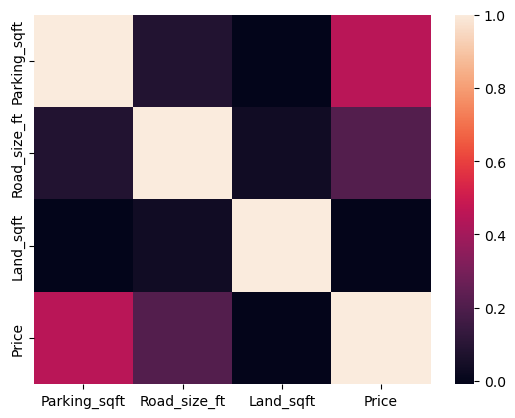

In [159]:
sns.heatmap(df.corr(numeric_only = True)) # Heatmap to see the relationship between columns
plt.show()

In [161]:
df.isnull().sum() # Checking for Null values

District          0
VDC               0
Direction         0
Bedroom           6
Bathroom          5
Living            7
Parking_sqft    191
Road_size_ft     89
Land_sqft         4
Price             8
dtype: int64

In [163]:
def make_int(column):
    try:
        return int(column) # try to make value integer
    except Exception as e:
        print(f"Error processing on {column} : {e}") # Else throw error
        return column

In [165]:
df['Bedroom']  = df['Bedroom'].apply(make_int)
df['Bathroom']  = df['Bathroom'].apply(make_int)
df['Living']  = df['Living'].apply(make_int)

Error processing on nan : cannot convert float NaN to integer
Error processing on nan : cannot convert float NaN to integer
Error processing on nan : cannot convert float NaN to integer
Error processing on nan : cannot convert float NaN to integer
Error processing on nan : cannot convert float NaN to integer
Error processing on nan : cannot convert float NaN to integer
Error processing on nan : cannot convert float NaN to integer
Error processing on nan : cannot convert float NaN to integer
Error processing on nan : cannot convert float NaN to integer
Error processing on nan : cannot convert float NaN to integer
Error processing on nan : cannot convert float NaN to integer
Error processing on nan : cannot convert float NaN to integer
Error processing on nan : cannot convert float NaN to integer
Error processing on nan : cannot convert float NaN to integer
Error processing on nan : cannot convert float NaN to integer
Error processing on nan : cannot convert float NaN to integer
Error pr

In [167]:
df.dtypes # Checking Datatype

District         object
VDC              object
Direction        object
Bedroom         float64
Bathroom        float64
Living          float64
Parking_sqft    float64
Road_size_ft    float64
Land_sqft       float64
Price           float64
dtype: object

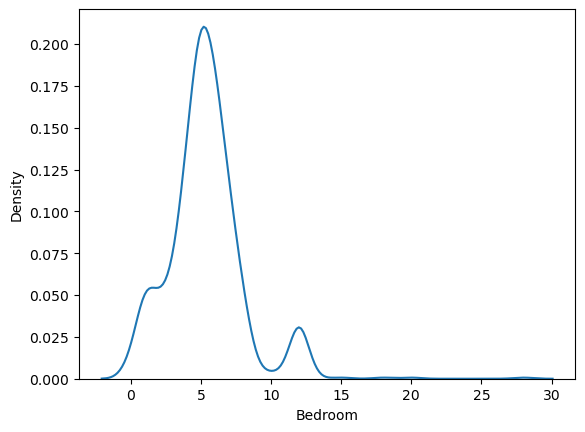

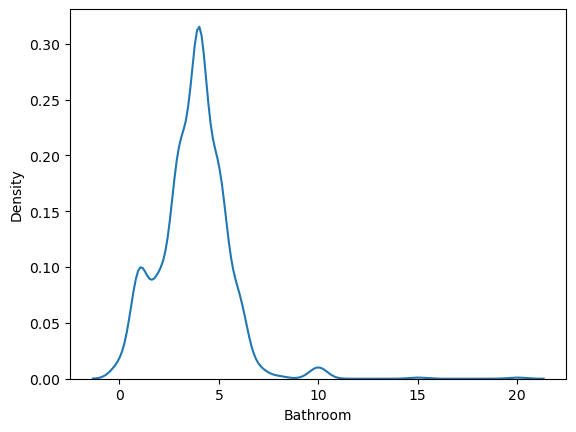

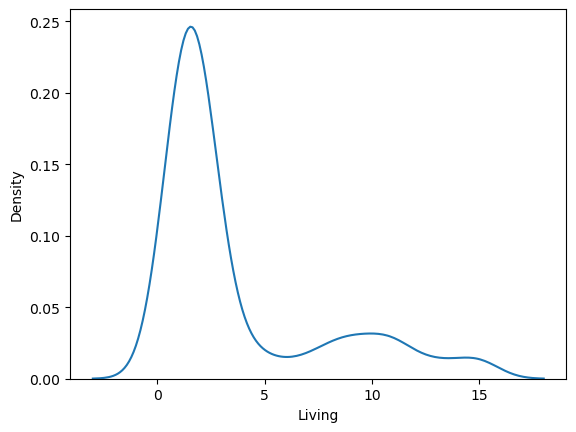

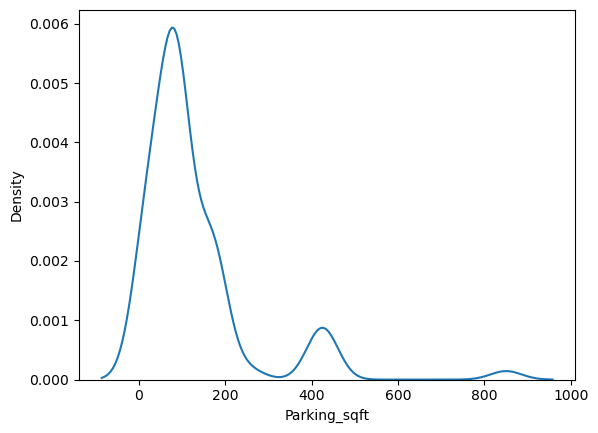

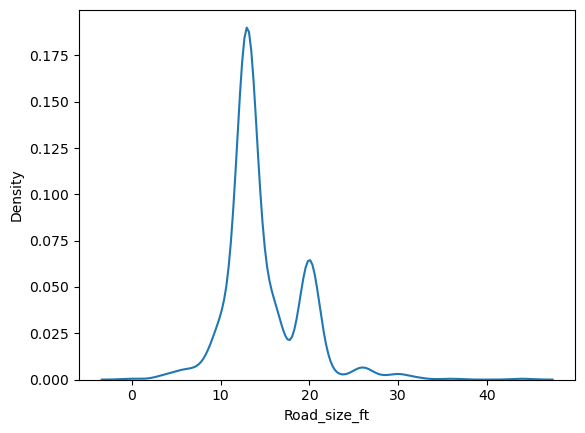

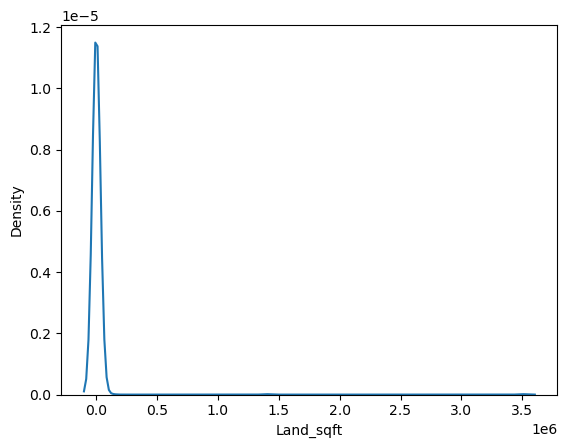

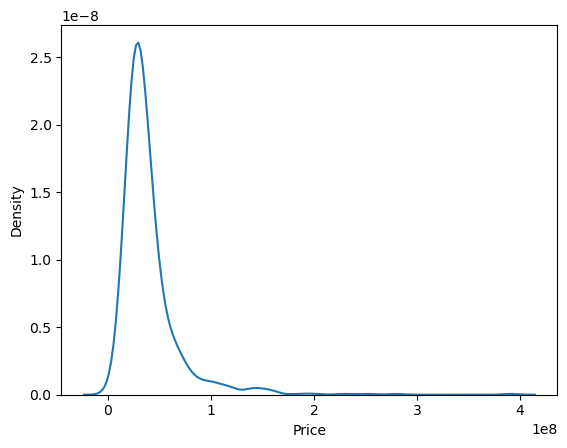

In [169]:
for i in df.select_dtypes(include='number').columns:
    sns.kdeplot(x = i,data = df)
    plt.show()

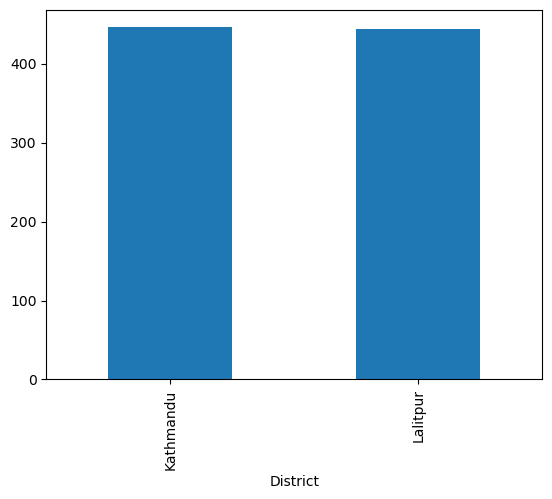

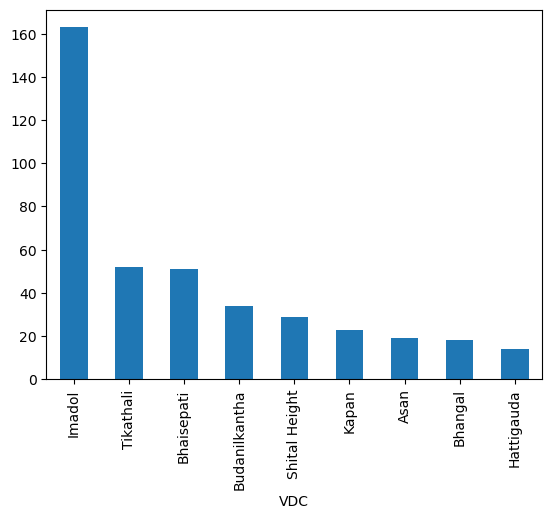

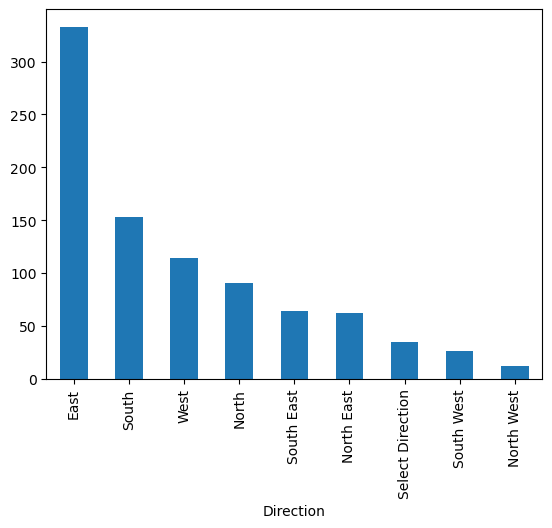

In [278]:
categorical_column = ['District','VDC','Direction']
for i in categorical_column:
    df[i].value_counts().head(9).plot(kind = 'bar')
    plt.show()

In [173]:
living = int(df['Living'].mean())
living

3

In [175]:
# Filling Missing Values with mean and median
df['Bedroom'] = df['Bedroom'].fillna(df['Bedroom'].median())
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].median())
df['Living'] = df['Living'].fillna(living)
df['Land_sqft'] = df['Land_sqft'].fillna(df['Land_sqft'].mean())
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [177]:
vdc_less = df['VDC'].value_counts()

In [179]:
vdcc = vdc_less[vdc_less < 10]
df['VDC'] = df['VDC'].apply(lambda x: 'other' if x in vdcc else x)

In [181]:
df['VDC'] = df['VDC'].fillna('other') # Fill value with 'other' if vdc count is less than 10

In [183]:
df1 = df.dropna()
df1['VDC'].value_counts()

VDC
other             429
Imadol             86
Tikathali          30
Kapan              14
Bhangal            10
Dhapakhel          10
Budhanilkantha      9
Bhaisepati          9
Gothatar            5
Shital Height       4
Hattigauda          3
Pepsicola           2
Name: count, dtype: int64

In [185]:
df.shape

(890, 10)

In [187]:
df.describe()

,Bedroom,Bathroom,Living,Parking_sqft,Road_size_ft,Land_sqft,Price
count,890.000000,890.000000,890.000000,699.000000,801.000000,8.900000e+02,8.900000e+02
mean,5.348315,3.737079,3.641573,126.394850,14.737828,9.942714e+03,3.971975e+07
std,2.681022,1.731231,3.883086,133.007718,4.322462,1.265986e+05,3.011081e+07
min,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000e+00,7.500000e+04
25%,4.000000,3.000000,1.000000,85.000000,13.000000,3.422400e+02,2.500000e+07
50%,5.000000,4.000000,2.000000,85.000000,13.000000,1.368960e+03,3.200000e+07
75%,6.000000,5.000000,4.000000,170.000000,16.000000,3.422400e+03,4.350000e+07
max,28.000000,20.000000,15.000000,850.000000,44.000000,3.504538e+06,3.910000e+08


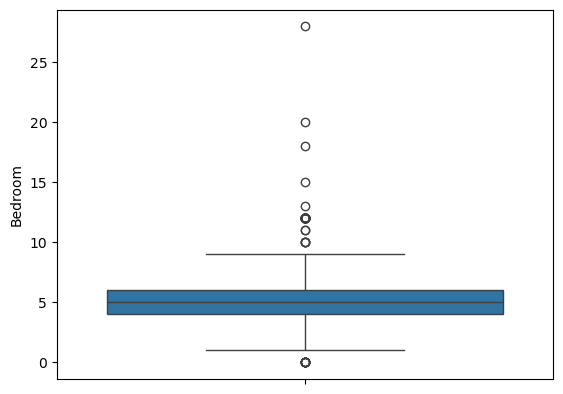

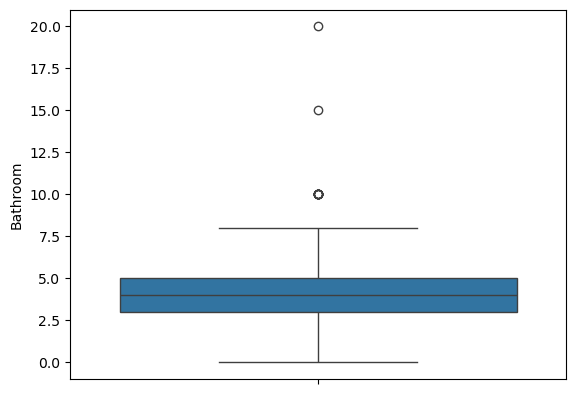

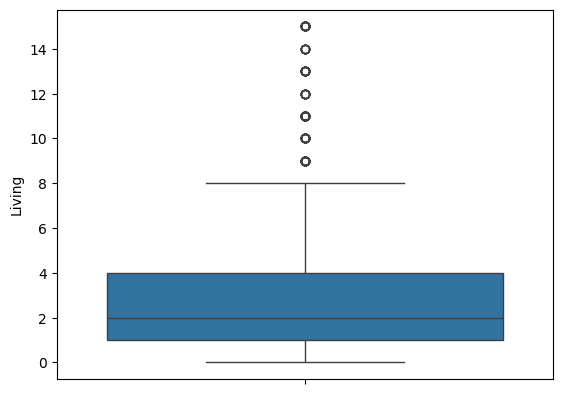

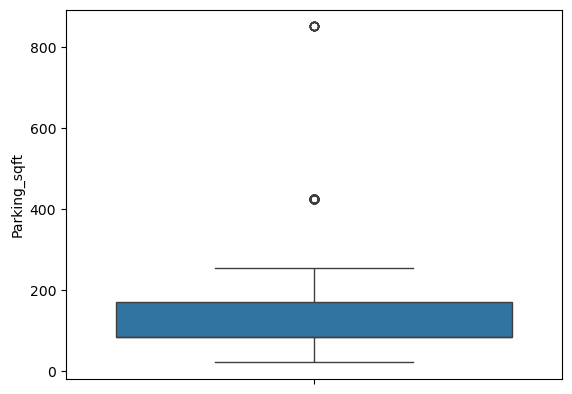

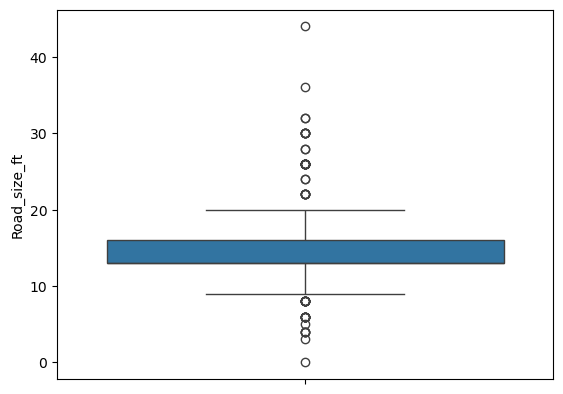

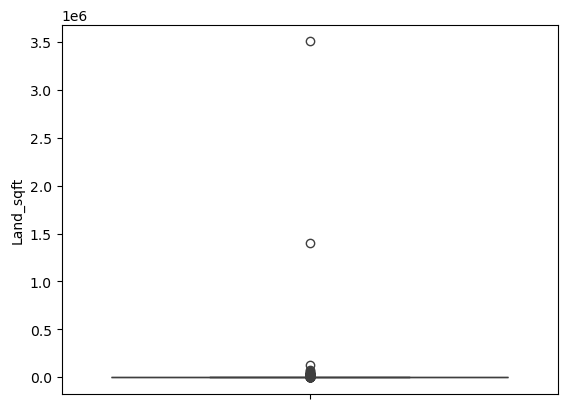

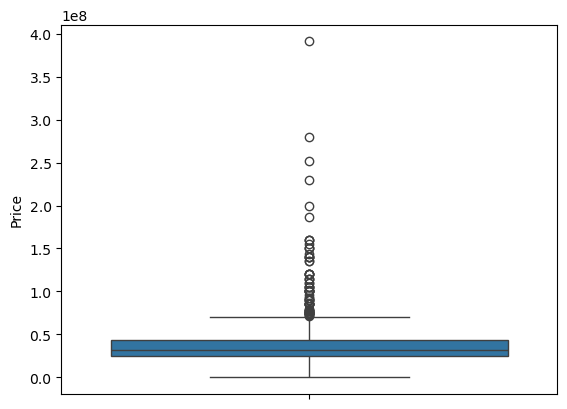

In [197]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(df[i])
    plt.show()

In [199]:
df.head()

,District,VDC,Direction,Bedroom,Bathroom,Living,Parking_sqft,Road_size_ft,Land_sqft,Price
0,Kathmandu,other,East,3.0,6.0,3.0,85.0,13.0,1026.72,21500000.0
2,Kathmandu,other,South,5.0,5.0,1.0,85.0,20.0,1368.96,50000000.0
4,Kathmandu,other,South,5.0,2.0,1.0,22.0,13.0,342.24,15000000.0
6,Kathmandu,other,South,3.0,3.0,3.0,170.0,13.0,1026.72,25000000.0
8,Kathmandu,other,East,6.0,5.0,2.0,170.0,20.0,1711.20,47500000.0


In [288]:
df.to_csv('ktm_house_price.csv')